In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
      --------------------------------------- 0.1/4.0 MB 272.3 kB/s eta 0:00:15
      --------------------------------------- 0.1/4.0 MB 272.3 kB/s eta 0:00:15
      --------------------------------------- 0.1/4.0 MB 272.3 kB/s eta 0:00:15
      --------------------------------------- 0.1/4.0 MB 272.3 kB/s eta 0:00:15
     - -------------------------------------- 0.2/4.0 MB 403.5 kB/s eta 0:00:10
     - --------------------------------

In [ ]:
#!pip install transformers accelerate optimum vllm llama-cpp-python

In [7]:
!pip install transformers==4.50.3

  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3


You should consider upgrading via the 'C:\Users\danie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install accelerate

In [8]:
!pip install optimum

  Using cached optimum-1.24.0-py3-none-any.whl.metadata (21 kB)
Using cached optimum-1.24.0-py3-none-any.whl (433 kB)


In [9]:
import vllm 

In [8]:
!pip cache purge

Files removed: 510


In [10]:
!pip install llama-cpp-python

  Using cached llama_cpp_python-0.3.8.tar.gz (67.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached diskcache-5.6.3-py3-none-any.whl.metadata (20 kB)
Using cached diskcache-5.6.3-py3-none-any.whl (45 kB)
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.8-cp312-cp312-win_amd64.whl size=4882383 sha256=4cdb2048c1cb9a0aa6531a7b142248b98b3b405e3b7e7fb176be6b6a0b2d64ab
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\e4\16\e0\1a8e6feea862ac9be1cc74654663a567fafa55caa19329785f
Successfully built llama-cpp-python


In [3]:
import torch

# Get the PyTorch version
torch_version = torch.__version__

# Check if CUDA is available
cuda_available = torch.cuda.is_available()

print(f"PyTorch version: {torch_version}")
print(f"CUDA available: {cuda_available}")

PyTorch version: 2.7.0+cu118
CUDA available: True


In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_path = "./Mistral-7B-v0.1"  # Path to the cloned model directory
model = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype="auto", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the cpu.


In [2]:
##Pre-emptive test##
import time

start_time = time.time()

prompt = "What are the key financial risks in SEC filings?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
output = model.generate(**inputs, max_new_tokens=256, temperature=0.6)

print(tokenizer.decode(output[0], skip_special_tokens=True))
print(f"Time taken: {time.time() - start_time} sec")

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\generation\configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


What are the key financial risks in SEC filings?

The SEC requires companies to disclose the most significant risks and uncertainties that could affect their business. These risks are typically categorized into three main categories: financial, operational, and legal.

Financial risks are those that could affect a company’s ability to generate revenue or profit. These risks can include changes in interest rates, currency fluctuations, and changes in the economy.

Operational risks are those that could affect a company’s ability to deliver its products or services. These risks can include changes in technology, changes in customer demand, and changes in the competitive landscape.

Legal risks are those that could affect a company’s ability to comply with laws and regulations. These risks can include changes in the law, changes in the regulatory environment, and changes in the political landscape.

## What are the key financial risks in SEC filings?

The SEC requires companies to disclos

In [ ]:
# too long ##
import time
import matplotlib.pyplot as plt

# Test prompt
prompt = "What are the key financial risks in SEC filings?"

# Initialize lists to store performance data
time_taken_list = []
tokens_per_second_list = []

# Run multiple tests to gather data for graph
num_tests = 10  # Number of tests to run
for _ in range(num_tests):
    # Start benchmarking
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate output
    output = model.generate(**inputs, max_new_tokens=256)

    # Measure time taken for inference
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Calculate tokens per second (inference speed)
    num_tokens = len(inputs["input_ids"][0]) + 256  # Original input + generated tokens
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

# Plotting the performance data
fig, ax1 = plt.subplots()

# Plot time taken
ax1.set_xlabel('Test Number')
ax1.set_ylabel('Time Taken (sec)', color='tab:blue')
ax1.plot(range(1, num_tests + 1), time_taken_list, color='tab:blue', label='Time Taken')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for tokens per second
ax2 = ax1.twinx()
ax2.set_ylabel('Tokens per Second', color='tab:green')
ax2.plot(range(1, num_tests + 1), tokens_per_second_list, color='tab:green', label='Tokens per Second')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Inference Performance Benchmark (Time vs Tokens/sec)')
fig.tight_layout()

# Show plot
plt.show()

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


KeyboardInterrupt: 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


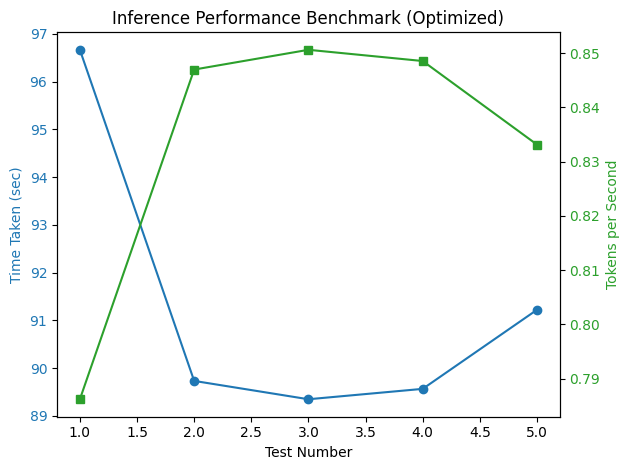

In [11]:
import time
import matplotlib.pyplot as plt
import torch

# Test prompt
prompt = "What are the key financial risks in SEC filings?"

# Initialize lists to store performance data
time_taken_list = []
tokens_per_second_list = []

# Number of test runs (reduce if slow)
num_tests = 5  

# Ensure model is in evaluation mode
model.eval()

# Run multiple tests to gather data for graph
for _ in range(num_tests):
    # Start benchmarking
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate output (Disable gradients for speed-up)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=64)  # Reduced tokens

    # Measure time taken for inference
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Calculate tokens per second (inference speed)
    num_tokens = len(inputs["input_ids"][0]) + 64  # Adjusted for new token limit
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

# Plotting the performance data
fig, ax1 = plt.subplots()

# Plot time taken
ax1.set_xlabel('Test Number')
ax1.set_ylabel('Time Taken (sec)', color='tab:blue')
ax1.plot(range(1, num_tests + 1), time_taken_list, color='tab:blue', marker='o', label='Time Taken')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for tokens per second
ax2 = ax1.twinx()
ax2.set_ylabel('Tokens per Second', color='tab:green')
ax2.plot(range(1, num_tests + 1), tokens_per_second_list, color='tab:green', marker='s', label='Tokens per Second')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Inference Performance Benchmark (Optimized)')
fig.tight_layout()
plt.show()


In [5]:
pip install evaluate

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install bert-score 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\danie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [14]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\danie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
pip install rouge_score absl-py

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24991 sha256=44a503e1bd53c2a545462bdbc5cd6920f67c0fc983bfeb7e2422ac2276e701f6
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\9b\3d\39\09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge-score
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\danie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\danie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it

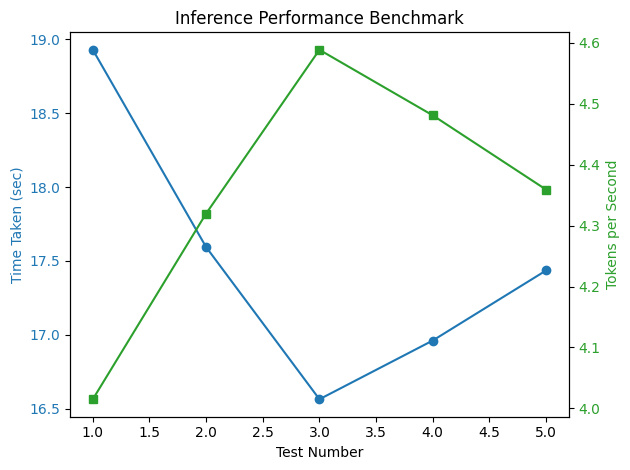

Average Perplexity: 51.06
Average ROUGE Score: 0.2769
Average BLEU Score: 0.1393
Average Edit Distance: 322.00
Average BERTScore: 0.3882
Win Rate: 0.00%
Average Token Throughput: 4.35 tokens/sec


In [3]:
import time
import torch
import matplotlib.pyplot as plt
import evaluate
import Levenshtein
from transformers import AutoModelForCausalLM, AutoTokenizer
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score

# Load evaluation metrics using the evaluate package
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

# Test prompt
prompt = "What are the key financial risks in SEC filings?"

# Initialize lists for performance metrics
time_taken_list = []
tokens_per_second_list = []
perplexity_list = []
rouge_scores = []
bleu_scores = []
edit_distance_list = []
bert_score_list = []
win_rate_list = []

# Number of test runs
num_tests = 5  
win_threshold = 0.8  # BERTScore threshold for Win% calculation

# Ensure model is in evaluation mode
model.eval()

# Run multiple tests to gather performance data
for _ in range(num_tests):
    # Start timing
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate output (Disable gradients for speed-up)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=64, temperature)

    # Decode output
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    # Measure inference time
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Compute tokens per second
    num_tokens = len(inputs["input_ids"][0]) + 64  # Adjusted for new token limit
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

    # Compute Perplexity (Corrected)
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])  # Pass input_ids as labels for loss calculation
        loss = outputs.loss  # Cross-entropy loss
        perplexity = torch.exp(loss).item()  # Perplexity is the exponential of the loss
        perplexity_list.append(perplexity)

    # Compute ROUGE score using evaluate package
    rouge_result = rouge.compute(predictions=[decoded_output], references=[prompt])
    rouge_scores.append(rouge_result["rougeL"])

    # Compute BLEU score using evaluate package
    bleu_result = bleu.compute(predictions=[decoded_output], references=[prompt])
    bleu_scores.append(bleu_result["bleu"])

    # Compute Edit Distance
    edit_distance = levenshtein_distance(decoded_output, prompt)
    edit_distance_list.append(edit_distance)

    # Compute BERTScore
    P, R, F1 = bert_score([decoded_output], [prompt], lang="en", rescale_with_baseline=True)
    bert_score_list.append(F1.mean().item())

    # Compute Win Rate (if BERTScore > threshold, consider it a "win")
    win_rate_list.append(1 if F1.mean().item() >= win_threshold else 0)

# Plot Performance Data
fig, ax1 = plt.subplots()

# Plot time taken
ax1.set_xlabel('Test Number')
ax1.set_ylabel('Time Taken (sec)', color='tab:blue')
ax1.plot(range(1, num_tests + 1), time_taken_list, color='tab:blue', marker='o', label='Time Taken')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for tokens per second
ax2 = ax1.twinx()
ax2.set_ylabel('Tokens per Second', color='tab:green')
ax2.plot(range(1, num_tests + 1), tokens_per_second_list, color='tab:green', marker='s', label='Tokens per Second')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Inference Performance Benchmark')
fig.tight_layout()
plt.show()

# Display Performance Metrics
print(f"Average Perplexity: {sum(perplexity_list) / num_tests:.2f}")
print(f"Average ROUGE Score: {sum(rouge_scores) / num_tests:.4f}")
print(f"Average BLEU Score: {sum(bleu_scores) / num_tests:.4f}")
print(f"Average Edit Distance: {sum(edit_distance_list) / num_tests:.2f}")
print(f"Average BERTScore: {sum(bert_score_list) / num_tests:.4f}")
print(f"Win Rate: {sum(win_rate_list) / num_tests * 100:.2f}%")
print(f"Average Token Throughput: {sum(tokens_per_second_list) / num_tests:.2f} tokens/sec")



In [2]:
pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 13.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install peft

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------- -------------------------- 4.5/12.9 MB 24.4 MB/s eta 0:00:01
   ------------------------------- -------- 10.2/12.9 MB 26.6 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 24.4 MB/s eta 0:00:00
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully un

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow==2.10.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==2.10.0


In [3]:
pip install transformers[torch]


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:

pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install panda 



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7296 sha256=8eff690c224a7fcc427680d471f918c77c2644308ddbc4b69976f5bb3a46a2b9
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\df\5c\39\36f8dae25a1e88d6ec4411dec4a143781e64fdff6897758eec
Successfully built panda



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install evaluate 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\danie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
pip install --upgrade bitsandbytes

   ---------------------------------------- 0.0/75.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/75.4 MB 1.3 MB/s eta 0:00:59
   ---------------------------------------- 0.2/75.4 MB 2.3 MB/s eta 0:00:34
    --------------------------------------- 1.2/75.4 MB 10.7 MB/s eta 0:00:07
   - -------------------------------------- 2.5/75.4 MB 15.7 MB/s eta 0:00:05
   -- ------------------------------------- 4.7/75.4 MB 22.9 MB/s eta 0:00:04
   --- ------------------------------------ 7.1/75.4 MB 28.4 MB/s eta 0:00:03
   ----- ---------------------------------- 9.9/75.4 MB 33.2 MB/s eta 0:00:02
   ------ --------------------------------- 12.3/75.4 MB 50.4 MB/s eta 0:00:02
   ------- -------------------------------- 14.7/75.4 MB 54.7 MB/s eta 0:00:02
   --------- ------------------------------ 17.2/75.4 MB 54.4 MB/s eta 0:00:02
   ---------- ----------------------------- 20.0/75.4 MB 54.4 MB/s eta 0:00:02
   ----------- ---------------------------- 22.6/75.4 MB 54.4 MB/s eta

In [8]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from transformers import Trainer, TrainingArguments
from evaluate import load
from Levenshtein import distance as levenshtein_distance

import time
splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/gretelai/gretel-financial-risk-analysis-v1/" + splits["train"])

# Convert dataframe to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Check the first few rows of the dataset to see what columns it has
print(dataset[:5])

{'input': ['"Item 8.01. Other Events.\n\nOn March 21, 2023, the Company entered into an agreement with its wholly-owned subsidiary, F5, Inc. (F5) to merge F5 with a subsidiary of the Company. The merger is expected to be completed in the second quarter of 2023, subject to the satisfaction of customary closing conditions, including the receipt of regulatory approvals from relevant authorities.\n\nThe merger consideration will be paid in cash, with the Company paying F5 stockholders approximately $4.4 billion, or $23.00 per share, in the aggregate. This price represents a premium of approximately 25% to the closing price of F5\'s common stock on the trading day preceding the announcement of the merger. The merger consideration will be funded with the Company\'s existing cash reserves, which totaled approximately $8.2 billion as of December 31, 2022. The Company has sufficient liquidity to fund the merger consideration and does not anticipate the need to raise additional debt or equity fi

In [1]:
pip install transformers --upgrade

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from transformers import Trainer, TrainingArguments
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

# Load dataset
splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/gretelai/gretel-financial-risk-analysis-v1/" + splits["train"])

# Convert dataframe to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Inspect the first few rows of the dataset to confirm structure
print(dataset[:5])  # Check the structure of 'input' and 'output'

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path)

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

# # Tokenize function (process both input and output)
# def tokenize_function(examples):
#     # We assume 'input' is the text and 'output' is the risk analysis structure
#     inputs = tokenizer(examples['input'], padding="max_length", truncation=True, max_length=512)
    
#     # Format the output and tokenize it
#     formatted_outputs = [format_output(output) for output in examples['output']]
#     outputs = tokenizer(formatted_outputs, padding="max_length", truncation=True, max_length=512)
    
#     inputs['labels'] = outputs['input_ids']  # Use the tokenized output as labels
#     return inputs

def tokenize_function(examples):
    # Iterate through the 'output' list for each instance and extract the 'analysis'
    analysis_list = [output_item['analysis'] for output_item in examples['output'] if 'analysis' in output_item]

    # Tokenize the 'analysis' text
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=512)

    return inputs

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load model with QLoRA quantization using BitsAndBytesConfig
quantization_config = BitsAndBytesConfig.from_pretrained(
    model_path=model_path,
    load_in_8bit=True  # Enable 4-bit quantization
)
model = AutoModelForCausalLM.from_pretrained(model_path, config=quantization_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Financial risk analysis for: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    decoded_preds = tokenizer.batch_decode(pred.predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(pred.label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

# Plotting performance metrics (optional, using your previous code)
# Collect metrics during training
time_taken_list = []
tokens_per_second_list = []
perplexity_list = []
rouge_scores = []
bleu_scores = []
edit_distance_list = []
bert_score_list = []
win_rate_list = []

num_tests = 5  # Number of tests for evaluation
win_threshold = 0.8  # BERTScore threshold for Win% calculation

model.eval()

for _ in range(num_tests):
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer("What are the key financial risks in SEC filings?", return_tensors="pt").to("cuda")

    # Generate output
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=64)

    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    # Measure inference time
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Compute tokens per second
    num_tokens = len(inputs["input_ids"][0]) + 64
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

    # Compute Perplexity
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss
        perplexity = torch.exp(loss).item()
        perplexity_list.append(perplexity)

    # Evaluate ROUGE and BLEU
    rouge_result = rouge.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
    rouge_scores.append(rouge_result["rougeL"])

    bleu_result = bleu.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
    bleu_scores.append(bleu_result["bleu"])

    # Levenshtein Edit Distance
    edit_distance = levenshtein_distance(decoded_output, "What are the key financial risks in SEC filings?")
    edit_distance_list.append(edit_distance)

    # BERTScore
    P, R, F1 = bert_score([decoded_output], ["What are the key financial risks in SEC filings?"], lang="en", rescale_with_baseline=True)
    bert_score_list.append(F1.mean().item())

    # Compute Win Rate
    win_rate_list.append(1 if F1.mean().item() >= win_threshold else 0)

# Output average performance metrics
print(f"Average Perplexity: {sum(perplexity_list) / num_tests:.2f}")
print(f"Average ROUGE Score: {sum(rouge_scores) / num_tests:.4f}")
print(f"Average BLEU Score: {sum(bleu_scores) / num_tests:.4f}")
print(f"Average Edit Distance: {sum(edit_distance_list) / num_tests:.2f}")
print(f"Average BERTScore: {sum(bert_score_list) / num_tests:.4f}")
print(f"Win Rate: {sum(win_rate_list) / num_tests * 100:.2f}%")
print(f"Average Token Throughput: {sum(tokens_per_second_list) / num_tests:.2f} tokens/sec")


{'input': ['"Item 8.01. Other Events.\n\nOn March 21, 2023, the Company entered into an agreement with its wholly-owned subsidiary, F5, Inc. (F5) to merge F5 with a subsidiary of the Company. The merger is expected to be completed in the second quarter of 2023, subject to the satisfaction of customary closing conditions, including the receipt of regulatory approvals from relevant authorities.\n\nThe merger consideration will be paid in cash, with the Company paying F5 stockholders approximately $4.4 billion, or $23.00 per share, in the aggregate. This price represents a premium of approximately 25% to the closing price of F5\'s common stock on the trading day preceding the announcement of the merger. The merger consideration will be funded with the Company\'s existing cash reserves, which totaled approximately $8.2 billion as of December 31, 2022. The Company has sufficient liquidity to fund the merger consideration and does not anticipate the need to raise additional debt or equity fi

Map:   0%|          | 0/827 [00:00<?, ? examples/s]

AttributeError: type object 'BitsAndBytesConfig' has no attribute 'from_pretrained'

In [20]:
pip install -U bitsandbytes 


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --upgrade bitsandbytes-cudaXXX  

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement bitsandbytes-cudaXXX (from versions: none)
ERROR: No matching distribution found for bitsandbytes-cudaXXX


In [27]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


In [8]:
from datasets import load_dataset

ds = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

README.md:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

c:\Users\danie\Anaconda5\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\danie\.cache\huggingface\hub\datasets--gretelai--gretel-financial-risk-analysis-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/458k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/827 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/207 [00:00<?, ? examples/s]

In [11]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Show the dataset's info
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'risk_severity', 'risk_categories', 'text_length', '__index_level_0__'],
        num_rows: 827
    })
    test: Dataset({
        features: ['input', 'output', 'risk_severity', 'risk_categories', 'text_length', '__index_level_0__'],
        num_rows: 207
    })
})


In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [10]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time


dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")


# Inspect the first few rows of the dataset to confirm structure
print(dataset[:5])  # Check the structure of 'input' and 'output'

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path)

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

# Tokenize function (process both input and output)
def tokenize_function(examples):
    # Iterate through the 'output' list for each instance and extract the 'analysis'
    analysis_list = [output_item['analysis'] for output_item in examples['output'] if 'analysis' in output_item]

    # Tokenize the 'analysis' text
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=512)

    return inputs

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    config=quantization_config,
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    eval_strategy ="epoch",
    save_strategy="epoch",
    eval_steps=500,  # If this raises an error, check for eval_strategy
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    decoded_preds = tokenizer.batch_decode(pred.predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(pred.label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],  # Correct training dataset
    eval_dataset=tokenized_datasets["test"],   # Correct testing dataset
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

# Plotting performance metrics (optional, using your previous code)
# Collect metrics during training
time_taken_list = []
tokens_per_second_list = []
perplexity_list = []
rouge_scores = []
bleu_scores = []
edit_distance_list = []
bert_score_list = []
win_rate_list = []

num_tests = 5  # Number of tests for evaluation
win_threshold = 0.8  # BERTScore threshold for Win% calculation

model.eval()

for _ in range(num_tests):
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer("What are the key financial risks in SEC filings?", return_tensors="pt").to("cuda")

    # Generate output
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=64)

    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    # Measure inference time
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Compute tokens per second
    num_tokens = len(inputs["input_ids"][0]) + 64
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

    # Compute Perplexity
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss
        perplexity = torch.exp(loss).item()
        perplexity_list.append(perplexity)

    # Evaluate ROUGE and BLEU
    rouge_result = rouge.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
    rouge_scores.append(rouge_result["rougeL"])

    bleu_result = bleu.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
    bleu_scores.append(bleu_result["bleu"])

    # Levenshtein Edit Distance
    edit_distance = levenshtein_distance(decoded_output, "What are the key financial risks in SEC filings?")
    edit_distance_list.append(edit_distance)

    # BERTScore
    P, R, F1 = bert_score([decoded_output], ["What are the key financial risks in SEC filings?"], lang="en", rescale_with_baseline=True)
    bert_score_list.append(F1.mean().item())

    # Compute Win Rate
    win_rate_list.append(1 if F1.mean().item() >= win_threshold else 0)

# Output average performance metrics
print(f"Average Perplexity: {sum(perplexity_list) / num_tests:.2f}")
print(f"Average ROUGE Score: {sum(rouge_scores) / num_tests:.4f}")
print(f"Average BLEU Score: {sum(bleu_scores) / num_tests:.4f}")
print(f"Average Edit Distance: {sum(edit_distance_list) / num_tests:.2f}")
print(f"Average BERTScore: {sum(bert_score_list) / num_tests:.4f}")
print(f"Win Rate: {sum(win_rate_list) / num_tests * 100:.2f}%")
print(f"Average Token Throughput: {sum(tokens_per_second_list) / num_tests:.2f} tokens/sec")


KeyError: "Invalid key: slice(None, 5, None). Please first select a split. For example: `my_dataset_dictionary['train'][slice(None, 5, None)]`. Available splits: ['test', 'train']"

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

#Load dataset

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path)

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

# Tokenize function (process both input and output)
def tokenize_function(examples):
    # Iterate through the 'output' list for each instance and extract the 'analysis'
    analysis_list = [output_item['analysis'] for output_item in examples['output'] if 'analysis' in output_item]

    # Tokenize the 'analysis' text
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=512)

    return inputs

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)


quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    config=quantization_config,
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Financial risk analysis for: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    eval_strategy ="epoch",
    save_strategy="epoch",
    eval_steps=500,  # If this raises an error, check for eval_strategy
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    decoded_preds = tokenizer.batch_decode(pred.predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(pred.label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

# Plotting performance metrics (optional, using your previous code)
# Collect metrics during training
time_taken_list = []
tokens_per_second_list = []
perplexity_list = []
rouge_scores = []
bleu_scores = []
edit_distance_list = []
bert_score_list = []
win_rate_list = []

num_tests = 5  # Number of tests for evaluation
win_threshold = 0.8  # BERTScore threshold for Win% calculation

model.eval()

for _ in range(num_tests):
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer("What are the key financial risks in SEC filings?", return_tensors="pt").to("cuda")

    # Generate output
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=64)

    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    # Measure inference time
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Compute tokens per second
    num_tokens = len(inputs["input_ids"][0]) + 64
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

    # Compute Perplexity
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss
        perplexity = torch.exp(loss).item()
        perplexity_list.append(perplexity)

    # Evaluate ROUGE and BLEU
    rouge_result = rouge.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
    rouge_scores.append(rouge_result["rougeL"])

    bleu_result = bleu.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
    bleu_scores.append(bleu_result["bleu"])

    # Levenshtein Edit Distance
    edit_distance = levenshtein_distance(decoded_output, "What are the key financial risks in SEC filings?")
    edit_distance_list.append(edit_distance)

    # BERTScore
    P, R, F1 = bert_score([decoded_output], ["What are the key financial risks in SEC filings?"], lang="en", rescale_with_baseline=True)
    bert_score_list.append(F1.mean().item())

    # Compute Win Rate
    win_rate_list.append(1 if F1.mean().item() >= win_threshold else 0)

# Output average performance metrics
print(f"Average Perplexity: {sum(perplexity_list) / num_tests:.2f}")
print(f"Average ROUGE Score: {sum(rouge_scores) / num_tests:.4f}")
print(f"Average BLEU Score: {sum(bleu_scores) / num_tests:.4f}")
print(f"Average Edit Distance: {sum(edit_distance_list) / num_tests:.2f}")
print(f"Average BERTScore: {sum(bert_score_list) / num_tests:.4f}")
print(f"Win Rate: {sum(win_rate_list) / num_tests * 100:.2f}%")
print(f"Average Token Throughput: {sum(tokens_per_second_list) / num_tests:.2f} tokens/sec")



{'input': ['"Item 8.01. Other Events.\n\nOn March 21, 2023, the Company entered into an agreement with its wholly-owned subsidiary, F5, Inc. (F5) to merge F5 with a subsidiary of the Company. The merger is expected to be completed in the second quarter of 2023, subject to the satisfaction of customary closing conditions, including the receipt of regulatory approvals from relevant authorities.\n\nThe merger consideration will be paid in cash, with the Company paying F5 stockholders approximately $4.4 billion, or $23.00 per share, in the aggregate. This price represents a premium of approximately 25% to the closing price of F5\'s common stock on the trading day preceding the announcement of the merger. The merger consideration will be funded with the Company\'s existing cash reserves, which totaled approximately $8.2 billion as of December 31, 2022. The Company has sufficient liquidity to fund the merger consideration and does not anticipate the need to raise additional debt or equity fi

Map:   0%|          | 0/827 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/827 [00:00<?, ? examples/s]

KeyError: "Column train not in the dataset. Current columns in the dataset: ['input', 'output', 'risk_severity', 'risk_categories', 'text_length', '__index_level_0__', 'input_ids', 'attention_mask', 'input_text']"

In [9]:
pip install accelerate>=0.26.0

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path,torch_dtype="auto", device_map="auto")

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]

    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=256)

    # Add 'labels' field for training (auto-regressive causal language models expect labels)
    inputs["labels"] = inputs["input_ids"].copy()

    return inputs

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    config=quantization_config,
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Financial risk analysis for: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    eval_strategy ="epoch",
    save_strategy="epoch",
    eval_steps=500,  # If this raises an error, check for eval_strategy
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    decoded_preds = tokenizer.batch_decode(pred.predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(pred.label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

# # Plotting performance metrics (optional, using your previous code)
# # Collect metrics during training
# time_taken_list = []
# tokens_per_second_list = []
# perplexity_list = []
# rouge_scores = []
# bleu_scores = []
# edit_distance_list = []
# bert_score_list = []
# win_rate_list = []

# num_tests = 5  # Number of tests for evaluation
# win_threshold = 0.8  # BERTScore threshold for Win% calculation

# model.eval()

# for _ in range(num_tests):
#     start_time = time.time()

#     # Tokenize input
#     inputs = tokenizer("What are the key financial risks in SEC filings?", return_tensors="pt").to("cuda")

#     # Generate output
#     with torch.no_grad():
#         output = model.generate(**inputs, max_new_tokens=64)

#     decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

#     # Measure inference time
#     time_taken = time.time() - start_time
#     time_taken_list.append(time_taken)

#     # Compute tokens per second
#     num_tokens = len(inputs["input_ids"][0]) + 64
#     tokens_per_second = num_tokens / time_taken
#     tokens_per_second_list.append(tokens_per_second)

#     # Compute Perplexity
#     with torch.no_grad():
#         outputs = model(**inputs, labels=inputs["input_ids"])
#         loss = outputs.loss
#         perplexity = torch.exp(loss).item()
#         perplexity_list.append(perplexity)

#     # Evaluate ROUGE and BLEU
#     rouge_result = rouge.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
#     rouge_scores.append(rouge_result["rougeL"])

#     bleu_result = bleu.compute(predictions=[decoded_output], references=["What are the key financial risks in SEC filings?"])
#     bleu_scores.append(bleu_result["bleu"])

#     # Levenshtein Edit Distance
#     edit_distance = levenshtein_distance(decoded_output, "What are the key financial risks in SEC filings?")
#     edit_distance_list.append(edit_distance)

#     # BERTScore
#     P, R, F1 = bert_score([decoded_output], ["What are the key financial risks in SEC filings?"], lang="en", rescale_with_baseline=True)
#     bert_score_list.append(F1.mean().item())

#     # Compute Win Rate
#     win_rate_list.append(1 if F1.mean().item() >= win_threshold else 0)

# # Output average performance metrics
# print(f"Average Perplexity: {sum(perplexity_list) / num_tests:.2f}")
# print(f"Average ROUGE Score: {sum(rouge_scores) / num_tests:.4f}")
# print(f"Average BLEU Score: {sum(bleu_scores) / num_tests:.4f}")
# print(f"Average Edit Distance: {sum(edit_distance_list) / num_tests:.2f}")
# print(f"Average BERTScore: {sum(bert_score_list) / num_tests:.4f}")
# print(f"Win Rate: {sum(win_rate_list) / num_tests * 100:.2f}%")
# print(f"Average Token Throughput: {sum(tokens_per_second_list) / num_tests:.2f} tokens/sec")


Using device: cuda


Map:   0%|          | 0/827 [00:00<?, ? examples/s]

Map:   0%|          | 0/207 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/827 [00:00<?, ? examples/s]

Map:   0%|          | 0/207 [00:00<?, ? examples/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 250.00 MiB. GPU 0 has a total capacity of 15.99 GiB of which 0 bytes is free. Of the allocated memory 29.86 GiB is allocated by PyTorch, and 288.66 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [27]:
pip install peft

  Using cached peft-0.15.2-py3-none-any.whl.metadata (13 kB)
Using cached peft-0.15.2-py3-none-any.whl (411 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")


# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path,torch_dtype="auto", device_map="auto", load_in_4bit=True)

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]

    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=256)

    # Add 'labels' field for training (auto-regressive causal language models expect labels)
    inputs["labels"] = inputs["input_ids"].copy()

    return inputs

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    config=quantization_config,
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=2,  # Rank of the low-rank adaptation matrices
    lora_alpha=16,  # Scaling factor for the low-rank matrices
    lora_dropout=0.1,  # Dropout rate for LoRA
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Financial risk analysis for: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    eval_strategy ="epoch",
    save_strategy="epoch",
    eval_steps=500,  # If this raises an error, check for eval_strategy
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# # Compute Metrics Function
def compute_metrics(pred):
        
    #Convert tensors to lists if they are tensors
    if isinstance(pred.predictions, torch.Tensor):
            pred.predictions = pred.predictions.tolist()
    if isinstance(pred.label_ids, torch.Tensor):
            pred.label_ids = pred.label_ids.tolist()

    decoded_preds = tokenizer.batch_decode(pred.predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(pred.label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }



# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")


Using device: cuda


Map:   0%|          | 0/207 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/827 [00:00<?, ? examples/s]

Map:   0%|          | 0/207 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
c:\Users\danie\Anaconda5\Lib\site-packages\transformers\integrations\sdpa_attention.py:54: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss


TypeError: argument 'ids': 'list' object cannot be interpreted as an integer

In [1]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path, torch_dtype="auto", device_map="auto", load_in_4bit=True)

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]
    
    print(f"Analysis List: {analysis_list}")  # Check the content of analysis_list
    
    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=256)
    
    print(f"Inputs: {inputs}")  # Check the structure of the tokenized inputs
    
    # Ensure that padding tokens are not included in the labels
    # Remove padding tokens from input_ids for the labels (if it's a language modeling task)
    inputs["input_ids"] = torch.tensor(inputs["input_ids"])
    
    # The labels should not include padding tokens (pad token is typically '2')
    # Replace padding tokens with -100 so they are ignored by the loss function
    inputs["labels"] = torch.tensor(inputs["input_ids"]).clone()
    inputs["labels"][inputs["labels"] == tokenizer.pad_token_id] = -100
    
    return inputs

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    config=quantization_config,
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=2,  # Rank of the low-rank adaptation matrices
    lora_alpha=16,  # Scaling factor for the low-rank matrices
    lora_dropout=0.1,  # Dropout rate for LoRA
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Financial risk analysis for: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    eval_strategy="epoch",
    save_strategy="epoch",
    eval_steps=500,  # If this raises an error, check for eval_strategy
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    
    # Convert tensors to lists if they are tensors
    if isinstance(pred.predictions, torch.Tensor):
        pred.predictions = pred.predictions.tolist()
    if isinstance(pred.label_ids, torch.Tensor):
        pred.label_ids = pred.label_ids.tolist()

    decoded_preds = tokenizer.batch_decode(pred.predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(pred.label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")


Using device: cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
c:\Users\danie\Anaconda5\Lib\site-packages\transformers\integrations\sdpa_attention.py:54: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss


TypeError: argument 'ids': 'list' object cannot be interpreted as an integer

In [ ]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path, torch_dtype="auto", device_map="auto", load_in_4bit=True)

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]
    
    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=256)
    
    # Ensure that padding tokens are not included in the labels
    # Convert to tensors
    labels = torch.tensor(inputs["input_ids"]).clone()
    # Replace padding tokens with -100 so they are ignored by the loss function
    labels[labels == tokenizer.pad_token_id] = -100
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=2,  # Rank of the low-rank adaptation matrices
    lora_alpha=16,  # Scaling factor for the low-rank matrices
    lora_dropout=0.1,  # Dropout rate for LoRA
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Financial risk analysis for: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=50,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function - FIXED
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

Using device: cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
c:\Users\danie\Anaconda5\Lib\site-packages\transformers\integrations\sdpa_attention.py:54: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss,Rougel,Bleu,Edit Distance,Bert Score,Win Rate
1,No log,1.982735,0.435085,0.134427,53.874396,0.349207,0.000000
2,No log,1.720618,0.484448,0.174453,49.256039,0.421224,0.072464
3,No log,1.676389,0.494940,0.187287,48.594203,0.432041,0.082126
4,1.816700,1.669335,0.494658,0.192939,49.241546,0.430160,0.077295
5,1.816700,1.670051,0.489776,0.195260,50.149758,0.430211,0.077295
6,1.816700,1.680781,0.490478,0.194314,49.869565,0.429453,0.077295
7,1.816700,1.702576,0.493149,0.192048,50.154589,0.432734,0.086957
8,1.334800,1.744738,0.487073,0.192317,50.748792,0.429132,0.082126
9,1.334800,1.821978,0.484805,0.192060,51.024155,0.422187,0.077295
10,1.334800,1.852146,0.482083,0.182873,51.975845,0.419383,0.077295


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

In [3]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig, EarlyStoppingCallback
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path, torch_dtype="auto", device_map="auto", load_in_4bit=True)

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]
    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=512)
    
    # Ensure that padding tokens are not included in the labels
    # Convert to tensors
    labels = torch.tensor(inputs["input_ids"]).clone()
    # Replace padding tokens with -100 so they are ignored by the loss function
    labels[labels == tokenizer.pad_token_id] = -100
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=8,  # Rank of the low-rank adaptation matrices
    lora_alpha=16,  # Scaling factor for the low-rank matrices
    lora_dropout=0.2,  # Dropout rate for LoRA
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Provide a detailed financial risk analysis report for the following data: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral_test_1",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=3e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function - FIXED
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

Using device: cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Rougel,Bleu,Edit Distance,Bert Score,Win Rate
1,No log,2.076955,0.387371,0.120454,55.623188,0.300789,0.000000
2,No log,1.796875,0.471336,0.151778,51.318841,0.398342,0.072464
3,No log,1.689005,0.485840,0.185971,48.879227,0.419948,0.077295
4,No log,1.650057,0.494347,0.192610,48.275362,0.429897,0.072464
5,No log,1.639529,0.499595,0.200151,48.434783,0.439500,0.082126
6,No log,1.636445,0.501358,0.200856,48.985507,0.443428,0.082126
7,No log,1.649966,0.500601,0.201657,49.106280,0.441134,0.082126
8,No log,1.654553,0.503817,0.204564,48.864734,0.445346,0.082126


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

In [2]:
pip install torch torchvision torchaudio cudatoolkit==11.6

  Using cached torchaudio-2.7.0-cp312-cp312-win_amd64.whl.metadata (6.7 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cudatoolkit==11.6 (from versions: none)
ERROR: No matching distribution found for cudatoolkit==11.6


In [10]:
import torch
torch.cuda.is_available()

True

In [1]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

NameError: name 'torch' is not defined

In [31]:
device = 'cuda' if torch.cuda.is_available() 
print(f"Using device: {device}")

SyntaxError: expected 'else' after 'if' expression (248968045.py, line 1)

In [1]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time
import matplotlib.pyplot as plt
from transformers.trainer_callback import TrainerCallback, TrainerState, TrainerControl

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Custom callback to track and log training loss with evaluation metrics
class TrainLossCallback(TrainerCallback):
    def __init__(self):
        super().__init__()
        self.training_loss = 0.0
        self.step_count = 0
        
    def on_log(self, args, state, control, logs=None, **kwargs):
        # Track loss from training steps
        if logs is not None and "loss" in logs and state.is_local_process_zero:
            self.training_loss += logs["loss"]
            self.step_count += 1
            
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        # Add training loss to evaluation metrics
        if metrics is not None and self.step_count > 0:
            # Calculate average training loss since last evaluation
            avg_train_loss = self.training_loss / self.step_count if self.step_count > 0 else 0
            metrics["train_loss"] = avg_train_loss
            
            # Reset for next evaluation interval
            self.training_loss = 0.0
            self.step_count = 0

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path, torch_dtype="auto", device_map="auto", load_in_4bit=True)

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]
    
    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=256)
    
    # Ensure that padding tokens are not included in the labels
    # Convert to tensors
    labels = torch.tensor(inputs["input_ids"]).clone()
    # Replace padding tokens with -100 so they are ignored by the loss function
    labels[labels == tokenizer.pad_token_id] = -100
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=2,  # Rank of the low-rank adaptation matrices
    lora_alpha=16,  # Scaling factor for the low-rank matrices
    lora_dropout=0.1,  # Dropout rate for LoRA
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Financial risk analysis for: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments with increased logging frequency
training_args = TrainingArguments(
    output_dir="./finetuned_mistral",  # Output directory for fine-tuned model
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=50,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,  # Log frequently to capture more training loss data points
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
    # Make sure we include loss in logs
    include_inputs_for_metrics=True,
    metric_for_best_model="eval_loss",  # Use eval loss to determine best model
    greater_is_better=False,            # Lower loss is better
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize loss tracking callback
train_loss_callback = TrainLossCallback()

# Custom Trainer class to ensure training loss is tracked
class CustomTrainer(Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.train_loss_history = []
        
    def log(self, logs):
        """Override log to capture training loss"""
        if "loss" in logs:
            self.train_loss_history.append(logs["loss"])
        super().log(logs)
    
    def evaluate(self, *args, **kwargs):
        """Override evaluate to include training loss in metrics"""
        metrics = super().evaluate(*args, **kwargs)
        
        # Calculate average training loss since last evaluation
        if len(self.train_loss_history) > 0:
            avg_train_loss = sum(self.train_loss_history) / len(self.train_loss_history)
            metrics["train_loss"] = avg_train_loss
            self.train_loss_history = []  # Reset for next evaluation
            
        return metrics

# Initialize Custom Trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
    callbacks=[train_loss_callback],
)

# Display training information
print(f"Model parameters: {model.num_parameters():,}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"Starting training with {len(tokenized_datasets['train'])} examples")

# Print header for metrics table
print("\nEpoch\tTraining Loss\tValidation Loss\tRougeL\tBleu\tEdit Distance\tBert Score\tWin Rate")

# Define custom evaluation hook to display metrics in table format
class MetricsLogger(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics:
            # Format for table display
            epoch = int(state.epoch)
            train_loss = metrics.get("train_loss", "No log")
            eval_loss = metrics.get("eval_loss", "No log")
            rougel = metrics.get("eval_rougeL", "No log")
            bleu = metrics.get("eval_bleu", "No log")
            edit_distance = metrics.get("eval_edit_distance", "No log")
            bert_score = metrics.get("eval_bert_score", "No log")
            win_rate = metrics.get("eval_win_rate", "No log")
            
            print(f"{epoch}\t{train_loss:.6f}\t{eval_loss:.6f}\t{rougel:.6f}\t{bleu:.6f}\t{edit_distance:.6f}\t{bert_score:.6f}\t{win_rate:.6f}")

# Add metrics logger callback
trainer.add_callback(MetricsLogger())

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

# Print final message
print("\nTraining complete. Model saved to './finetuned_mistral'")

Using device: cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using `include_inputs_for_metrics` is deprecated and will be removed in version 5 of 🤗 Transformers. Please use `include_for_metrics` list argument instead.
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Model parameters: 7,242,584,064
Trainable parameters: 851,968
Starting training with 827 examples

Epoch	Training Loss	Validation Loss	RougeL	Bleu	Edit Distance	Bert Score	Win Rate


c:\Users\danie\Anaconda5\Lib\site-packages\transformers\integrations\sdpa_attention.py:54: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss


TypeError: CustomTrainer.log() takes 2 positional arguments but 3 were given

In [ ]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig, EarlyStoppingCallback
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path, torch_dtype="auto", device_map="auto", load_in_4bit=True)

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Keep only the 'input' and 'output' columns
train_dataset = dataset["train"][["input", "output"]]
test_dataset = dataset["test"][["input", "output"]]

print(train_dataset[:2])

# If pad_token is not defined, use eos_token as pad_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract 'input' and 'output' fields
    input_text = examples['input']
    output_text = examples['output']
    
    # Tokenize 'input' and 'output' pairs
    inputs = tokenizer(input_text, padding=True, truncation=True, max_length=512)
    
    # Labels are the 'output' texts
    labels = tokenizer(output_text, padding=True, truncation=True, max_length=512)
    
    # Ensure padding tokens are not included in the labels
    labels = torch.tensor(labels["input_ids"]).clone()
    labels[labels == tokenizer.pad_token_id] = -100  # Replace padding tokens with -100 so they are ignored in the loss computation
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets with the new function
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)


# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=8,  # Rank of the low-rank adaptation matrices
    lora_alpha=16,  # Scaling factor for the low-rank matrices
    lora_dropout=0.2,  # Dropout rate for LoRA
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Provide a detailed financial risk analysis report for the following data: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = tokenized_datasets.map(add_prompt, batched=True)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral_test_1",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=3e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function - FIXED
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")

Using device: cuda


Map:   0%|          | 0/827 [00:00<?, ? examples/s]

Map:   0%|          | 0/207 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/827 [00:00<?, ? examples/s]

Map:   0%|          | 0/207 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig, EarlyStoppingCallback
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Keep only the 'input' and 'output' columns
train_dataset = dataset["train"].select_columns(["input", "output"])
test_dataset = dataset["test"].select_columns(["input", "output"])

# Split the train dataset into train and validation sets (90% train, 10% validation)
train_dataset, val_dataset = train_dataset.train_test_split(test_size=0.1, seed=42).values()

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

def tokenize_function(examples):
    # Extract 'input' and 'output' fields
    input_text = examples['input']
    output_text = examples['output']
    
    # Tokenize 'input' and 'output' pairs
    inputs = tokenizer(input_text, padding=True, truncation=True, max_length=512)
    
    # Labels are the 'output' texts
    labels = tokenizer(output_text, padding=True, truncation=True, max_length=512)
    
    # Ensure padding tokens are not included in the labels
    labels = np.array(labels["input_ids"])
    labels = np.where(labels == tokenizer.pad_token_id, -100, labels)
    labels[labels == tokenizer.pad_token_id] = -100  # Replace padding tokens with -100 so they are ignored in the loss computation
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets with the new function
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 during computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=32,  # Rank of the low-rank adaptation matrices
    lora_alpha=64,  # Scaling factor for the low-rank matrices
    lora_dropout=0.5,  # Dropout rate for LoRA
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Set up PEFA (Prompted Embeddings for Fine-Tuning)
def add_prompt(examples):
    prompt = "Provide a detailed financial risk analysis report for the following data: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Add prompts to dataset for PEFA
tokenized_datasets = DatasetDict({
    'train': tokenized_train_dataset,
    'validation': tokenized_val_dataset,
    'test': tokenized_test_dataset
})

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral_test_1",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=2.5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function - FIXED
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],  # Validation dataset for overfitting monitoring
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

test_results = trainer.predict(tokenized_datasets["test"])
model.config.use_cache = False

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistral")


Using device: cuda


Map:   0%|          | 0/744 [00:00<?, ? examples/s]

ValueError: Asking to pad but the tokenizer does not have a padding token. Please select a token to use as `pad_token` `(tokenizer.pad_token = tokenizer.eos_token e.g.)` or add a new pad token via `tokenizer.add_special_tokens({'pad_token': '[PAD]'})`.

In [1]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig, EarlyStoppingCallback
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Keep only the 'input' and 'output' columns
train_dataset = dataset["train"].select_columns(["input", "output"])
test_dataset = dataset["test"].select_columns(["input", "output"])

# Split the train dataset into train and validation sets (90% train, 10% validation)
train_dataset, val_dataset = train_dataset.train_test_split(test_size=0.1, seed=42).values()

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

# Add prompt to dataset
def add_prompt(examples):
    prompt = "Provide a detailed financial risk analysis report for the following data: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Apply the prompt function
train_dataset = train_dataset.map(add_prompt)
val_dataset = val_dataset.map(add_prompt)
test_dataset = test_dataset.map(add_prompt)

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]
    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=512)
    
    # Ensure that padding tokens are not included in the labels
    # Convert to tensors
    labels = torch.tensor(inputs["input_ids"]).clone()
    # Replace padding tokens with -100 so they are ignored by the loss function
    labels[labels == tokenizer.pad_token_id] = -100
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets with the new function
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_8bit=True,  # Enable 4-bit quantization
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=32,  # Rank of the low-rank adaptation matrices
    lora_alpha=64,  # Scaling factor for the low-rank matrices
    lora_dropout=0.5,  # Dropout rate for LoRA
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral_test_1",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=2.5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.5,
    logging_strategy="epoch",
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,  # Validation dataset for overfitting monitoring
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistralv2")


Using device: cuda


`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Rougel,Bleu,Edit Distance,Bert Score,Win Rate
0,3.105600,2.205373,0.392674,0.128662,58.180723,0.279938,0.000000


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\peft\utils\save_and_load.py:221: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig, EarlyStoppingCallback
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Keep only the 'input' and 'output' columns
train_dataset = dataset["train"].select_columns(["input", "output"])
test_dataset = dataset["test"].select_columns(["input", "output"])

# Split the train dataset into train and validation sets (90% train, 10% validation)
train_dataset, val_dataset = train_dataset.train_test_split(test_size=0.1, seed=42).values()

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

# Add prompt to dataset
def add_prompt(examples):
    prompt = "Provide a detailed financial risk analysis report for the following data: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Apply the prompt function
train_dataset = train_dataset.map(add_prompt)
val_dataset = val_dataset.map(add_prompt)
test_dataset = test_dataset.map(add_prompt)

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]
    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=512)
    
    # Ensure that padding tokens are not included in the labels
    # Convert to tensors
    labels = torch.tensor(inputs["input_ids"]).clone()
    # Replace padding tokens with -100 so they are ignored by the loss function
    labels[labels == tokenizer.pad_token_id] = -100
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets with the new function
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use float16 for computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # Use nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=32,  # Rank of the low-rank adaptation matrices
    lora_alpha=64,  # Scaling factor for the low-rank matrices
    lora_dropout=0.5,  # Dropout rate for LoRA
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral_test_1",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=2.5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.5,
    logging_strategy="epoch",
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,  # Validation dataset for overfitting monitoring
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistralv2")


Using device: cuda


`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Rougel,Bleu,Edit Distance,Bert Score,Win Rate
0,3.099700,2.205254,0.395210,0.134229,57.578313,0.284786,0.000000
1,2.492500,1.871149,0.492941,0.171987,51.626506,0.393222,0.000000
2,2.196600,1.729598,0.509396,0.179823,51.265060,0.415003,0.036145
3,2.014500,1.652104,0.526933,0.191453,49.168675,0.443189,0.036145
4,1.868000,1.612033,0.527749,0.197419,49.180723,0.452007,0.036145
5,1.788600,1.582576,0.534011,0.207210,48.397590,0.454240,0.036145
6,1.715300,1.569524,0.530759,0.211125,47.674699,0.454567,0.036145
7,1.635900,1.566796,0.529569,0.203628,48.240964,0.454676,0.036145
8,1.592800,1.567090,0.524240,0.204066,48.987952,0.449475,0.036145
9,1.327200,1.566679,0.523864,0.204685,49.096386,0.454470,0.048193


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\peft\utils\save_and_load.py:221: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\peft\utils\save_and_load.py:221: UserWarning: Setting `save_e

In [5]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, BitsAndBytesConfig, EarlyStoppingCallback
import torch
from evaluate import load
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
import time

from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")

# Initialize tokenizer
model_path = "./Mistral-7B-v0.1"  # Adjust to your model path
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Keep only the 'input' and 'output' columns
train_dataset = dataset["train"].select_columns(["input", "output"])
test_dataset = dataset["test"].select_columns(["input", "output"])

# Split the train dataset into train and validation sets (90% train, 10% validation)
train_dataset, val_dataset = train_dataset.train_test_split(test_size=0.1, seed=42).values()

# Function to format the entire 'output' into a textual description
def format_output(output):
    formatted_output = ""
    for item in output:
        formatted_output += f"Analysis: {item['analysis']}\n"
        
        if item['financial_impact']:
            financial_impact = item['financial_impact']
            formatted_output += f"Financial Impact: Amount: {financial_impact.get('amount', 'N/A')} "
            formatted_output += f"Recurring: {financial_impact.get('recurring', 'N/A')} "
            formatted_output += f"Timeframe: {financial_impact.get('timeframe', 'N/A')}\n"
        
        if item['key_metrics']:
            key_metrics = item['key_metrics']
            formatted_output += f"Key Metrics: Debt Outstanding: {key_metrics.get('debt_outstanding', 'N/A')}, "
            formatted_output += f"Hedge Ratio: {key_metrics.get('hedge_ratio', 'N/A')}, "
            formatted_output += f"Interest Rate: {key_metrics.get('interest_rate', 'N/A')}, "
            formatted_output += f"Tax Exposure: {key_metrics.get('tax_exposure', 'N/A')}\n"
        
        formatted_output += f"Risk Categories: {', '.join(item['risk_categories'])}\n"
        formatted_output += f"Risk Severity: {item['risk_severity']}\n\n"
    
    return formatted_output

# Add prompt to dataset
def add_prompt(examples):
    prompt = "Provide a detailed financial risk analysis report for the following data: "
    examples['input_text'] = [prompt + text for text in examples['input']]
    return examples

# Apply the prompt function
train_dataset = train_dataset.map(add_prompt)
val_dataset = val_dataset.map(add_prompt)
test_dataset = test_dataset.map(add_prompt)

def tokenize_function(examples):
    # Extract analysis from the output field and tokenize the analysis
    analysis_list = [output_item['analysis'] for output_item in examples['output']]
    # Tokenize the analysis
    inputs = tokenizer(analysis_list, padding=True, truncation=True, max_length=4096)
    
    # Ensure that padding tokens are not included in the labels
    # Convert to tensors
    labels = torch.tensor(inputs["input_ids"]).clone()
    # Replace padding tokens with -100 so they are ignored by the loss function
    labels[labels == tokenizer.pad_token_id] = -100
    
    # Return dictionary with input_ids, attention_mask, and labels
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": labels
    }

# Tokenize datasets with the new function
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use float16 for computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # Use nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=32,  # Rank of the low-rank adaptation matrices
    lora_alpha=64,  # Scaling factor for the low-rank matrices
    lora_dropout=0.5,  # Dropout rate for LoRA
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)

# Define Trainer Arguments
training_args = TrainingArguments(
    output_dir="./finetuned_mistral_test_1",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=2.5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_strategy="epoch",
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

# Initialize evaluation metrics
rouge = load("rouge")
bleu = load("bleu")

# Compute Metrics Function
def compute_metrics(pred):
    # Get predictions from logits
    predictions = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    
    # For generative models, predictions are often logits
    # We need to get the argmax to convert to token IDs
    if len(predictions.shape) > 2:  # [batch, seq_len, vocab_size]
        predictions = np.argmax(predictions, axis=-1)
    
    # Filter out -100 padding tokens from labels
    label_ids = pred.label_ids
    label_ids = np.where(label_ids != -100, label_ids, tokenizer.pad_token_id)
    
    # Now decode
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Levenshtein Distance
    edit_distance = sum([levenshtein_distance(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)
    
    # BERTScore
    P, R, F1 = bert_score(decoded_preds, decoded_labels, lang="en", rescale_with_baseline=True)
    avg_bert_score = F1.mean().item()
    
    # Win Rate based on BERTScore
    win_rate = sum([1 if f1 >= 0.8 else 0 for f1 in F1]) / len(F1)
    
    return {
        "rougeL": rouge_result["rougeL"],
        "bleu": bleu_result["bleu"],
        "edit_distance": edit_distance,
        "bert_score": avg_bert_score,
        "win_rate": win_rate,
    }

# Initialize Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,  # Validation dataset for overfitting monitoring
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Start fine-tuning
trainer.train()

# Save the fine-tuned model
trainer.save_model("./finetuned_mistralv2")


Using device: cuda


`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Rougel,Bleu,Edit Distance,Bert Score,Win Rate
0,3.105000,2.212131,0.393692,0.130002,57.963855,0.276190,0.000000
1,2.496400,1.875306,0.492893,0.176183,51.469880,0.389722,0.000000
2,2.198900,1.732040,0.512763,0.177766,50.590361,0.417269,0.036145
3,2.015300,1.653149,0.526042,0.193288,49.192771,0.444999,0.036145
4,1.866500,1.612559,0.526720,0.200249,48.927711,0.456103,0.036145
5,1.786200,1.582451,0.530688,0.202311,48.481928,0.452353,0.036145
6,1.712200,1.569502,0.529723,0.209470,47.771084,0.455001,0.036145
7,1.633800,1.566733,0.525895,0.205484,48.301205,0.453114,0.036145
8,1.589600,1.566168,0.525641,0.208796,48.578313,0.458394,0.048193
9,1.324300,1.565607,0.526318,0.208334,48.481928,0.459216,0.048193


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\peft\utils\save_and_load.py:221: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dens

In [6]:
import pandas as pd

# Convert to pandas DataFrame and select relevant columns ('input' and 'output')
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)

# Display the first 5 rows of each dataset
print("Train Dataset (first 5 rows):")
print(train_df[['input', 'output']].head())

print("\nTest Dataset (first 5 rows):")
print(test_df[['input', 'output']].head())

Train Dataset (first 5 rows):
                                               input  \
0  Our operations and financial results may be af...   
1  operations, financial condition, or results of...   
2  A. Our 2022 Annual Report on Form 10-K and our...   
3  "and a higher percentage of our gross profit i...   
4  ", we are not required to provide the same lev...   

                                              output  
0  {'analysis': 'Changes in raw material prices, ...  
1  {'analysis': 'COVID-19 pandemic has caused sig...  
2  {'analysis': 'Ongoing impact of COVID-19 pande...  
3  {'analysis': 'Shift in demand towards lower-ma...  
4  {'analysis': 'Complex regulatory landscape wit...  

Test Dataset (first 5 rows):
                                               input  \
0  Item 7A. Quantitative and Qualitative Disclosu...   
1  "of $5.0 billion in 2022, $5.2 billion in 2021...   
2  "A further explanation of the Company’s accoun...   
3  Accounting Standards Adopted in 2023, 2022, an

In [8]:
import pandas as pd

# Set pandas options to display full content
pd.set_option('display.max_colwidth', None)  # No truncation for column content

# Convert to pandas DataFrame and select relevant columns ('input' and 'output')
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)

# Get one data instance from the train dataset
one_train_instance = train_df[['input', 'output']].iloc[0]
print("One Train Data Instance:")
print(one_train_instance)

# Get one data instance from the test dataset
one_test_instance = test_df[['input', 'output']].iloc[0]
print("\nOne Test Data Instance:")
print(one_test_instance)

One Train Data Instance:
input     Our operations and financial results may be affected by changes in the price of our products and services and the prices of products and services provided by our competitors. We also may be affected by changes in the prices of raw materials, labor, and other costs of producing our products and services. In addition, we may be affected by changes in the prices of products and services provided by our suppliers. The prices of our products and services are subject to a variety of factors, including the cost of raw materials, labor, and other costs of producing our products and services, the prices of products and services provided by our competitors, and the prices of products and services provided by our suppliers. If the prices of our products and services or the prices of products and services provided by our suppliers or our competitors increase, our gross profit may be negatively affected.\n\nSpecifically, changes in the prices of raw materials, suc

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import torch
import pandas as pd

# Load dataset
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")
train_df = dataset["train"].to_pandas()
val_df = dataset["test"].to_pandas()

# Load local Mistral tokenizer and model
model_path = "./Mistral-7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token  # Mistral uses eos as pad

model = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype=torch.float16, device_map="auto")

# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use float16 for computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for better performance
    bnb_4bit_quant_type="nf4"  # Use nf4 quantization type
)

# Load the base model with the quantization configuration
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,  # Fix: use quantization_config instead of config
    torch_dtype=torch.float16  # Use mixed precision for faster computation
)

# Apply LoRA configuration
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=32,  # Rank of the low-rank adaptation matrices
    lora_alpha=64,  # Scaling factor for the low-rank matrices
    lora_dropout=0.5,  # Dropout rate for LoRA
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)


# Prompt formatting: simulate system + user + assistant style
SYSTEM_MESSAGE = (
    "You are an expert financial risk analyst. Analyze the provided text for financial risks, "
    "and output a structured assessment in JSON format including risk detection, specific risk flags, "
    "financial exposure details, and analysis notes."
)

def format_prompt(example):
    return {
        "text": f"<s>[INST] <<SYS>>\n{SYSTEM_MESSAGE}\n<</SYS>>\n\n{example['input']} [/INST] {example['output']}</s>"
    }

train_data = train_df[["input", "output"]].apply(format_prompt, axis=1)
val_data = val_df[["input", "output"]].apply(format_prompt, axis=1)

# Tokenize
def tokenize_fn(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=512)

train_dataset = list(map(tokenize_fn, train_data.to_list()))
val_dataset = list(map(tokenize_fn, val_data.to_list()))

# Trainer setup
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

training_args = TrainingArguments(
    output_dir="./finetuned_mistral_finetuned_risk",  # Output directory for fine-tuned model
    eval_strategy="epoch",  
    save_strategy="epoch",
    eval_steps=500,
    learning_rate=2.5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_strategy="epoch",
    logging_dir="./logs",
    logging_steps=200,
    save_steps=500,
    load_best_model_at_end=True,
    report_to="tensorboard",  # Optional: use tensorboard for logging
    gradient_accumulation_steps=16,  # Adjust batch size for large models
    fp16=True,  # Enable mixed precision for faster training
    prediction_loss_only=False,  # We need predictions for metric calculation
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Fine-tune
trainer.train()

# Save the fine-tuned model and tokenizer
save_directory = "./mistral-risk-finetuned"

model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import torch
import pandas as pd
import os
from peft import LoraConfig, get_peft_model, TaskType, PeftModel
from transformers import BitsAndBytesConfig

# Load dataset
print("Loading dataset...")
dataset = load_dataset("gretelai/gretel-financial-risk-analysis-v1")
train_df = dataset["train"].to_pandas()
val_df = dataset["test"].to_pandas()

# Load local Mistral tokenizer
print("Loading tokenizer...")
model_path = "./Mistral-7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token  # Mistral uses eos as pad

# Quantization configuration
print("Setting up quantization...")
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Load model weights in 2-bit precision (instead of 4-bit)
    bnb_4bit_compute_dtype=torch.float16,  # Compute in float16 for better speed and memory usage
    bnb_4bit_use_double_quant=True,  # Double quantization for improved model efficiency
    bnb_4bit_quant_type="nf4"  # Using nf4 type for improved performance (could be adjusted for 2-bit)
)

# Load the base model with quantization
print("Loading model with quantization...")
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    quantization_config=quantization_config,
    device_map="auto",
    torch_dtype=torch.float16
)

# Apply LoRA configuration
print("Configuring LoRA...")
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=16,  # Reduced rank for better stability
    lora_alpha=32,
    lora_dropout=0.5,  # Reduced dropout for better stability
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],  # Removed lm_head as it can cause issues with Mistral architecture
    bias="none",
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()  # Print which parameters will be trained

# Prompt formatting: simulate system + user + assistant style
SYSTEM_MESSAGE = (
    "You are an expert financial risk analyst. Analyze the provided text for financial risks, "
    "and output a structured assessment in JSON format including risk detection, specific risk flags, "
    "financial exposure details, and analysis notes."
)

# Create proper tokenized datasets
def preprocess_function(examples):
    formatted_prompts = []
    for i in range(len(examples["input"])):
        prompt = f"<s>[INST] <<SYS>>\n{SYSTEM_MESSAGE}\n<</SYS>>\n\n{examples['input'][i]} [/INST] {examples['output'][i]}</s>"
        formatted_prompts.append(prompt)
    
    # Tokenize all prompts at once for efficiency
    tokenized = tokenizer(
        formatted_prompts,
        padding="max_length",
        truncation=True,
        max_length=512,  # Increased to handle longer context
        return_tensors="pt"
    )
    
    # Convert to proper format for Trainer
    result = {
        "input_ids": tokenized["input_ids"],
        "attention_mask": tokenized["attention_mask"],
        "labels": tokenized["input_ids"].clone()
    }
    
    return result

print("Processing training data...")
train_dataset = dataset["train"].map(
    preprocess_function,
    batched=True,
    batch_size=16,
    remove_columns=dataset["train"].column_names
)

print("Processing validation data...")
val_dataset = dataset["test"].map(
    preprocess_function,
    batched=True,
    batch_size=16,
    remove_columns=dataset["test"].column_names
)

# Set up training arguments with appropriate values for the task
training_args = TrainingArguments(
    output_dir="./mistral_risk_finetuned",
    eval_strategy="epochs",
    eval_steps=100,
    save_strategy="epochs",
    save_steps=100,
    learning_rate=2e-5,
    per_device_train_batch_size=2,  # Reduced to prevent OOM errors
    per_device_eval_batch_size=2,
    num_train_epochs=6,  # Reduced to prevent overfitting
    weight_decay=0.5,
    logging_steps=10,
    save_total_limit=3,  # Only keep the 3 best checkpoints
    load_best_model_at_end=True,
    gradient_accumulation_steps=16,  # Effectively increases batch size
    fp16=True,
    report_to="tensorboard",
    lr_scheduler_type="cosine",
    warmup_ratio=0.1,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
)

# DataCollator for causal language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # Not using masked language modeling
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
)

# Fine-tune
print("Starting training...")
trainer.train()

# Save the fine-tuned model
save_directory = "./mistral-risk-finetuned-final"
os.makedirs(save_directory, exist_ok=True)

# Save the model adapter weights (LoRA)
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)
print(f"Model and tokenizer saved to {save_directory}")

# Merge adapter weights with base model for inference (optional)
print("Creating merged model for easier inference...")
merged_model_path = "./mistral-risk-merged"
os.makedirs(merged_model_path, exist_ok=True)

# # Load the base model again
# base_model = AutoModelForCausalLM.from_pretrained(
#     model_path,
#     device_map="auto",
#     torch_dtype=torch.float16
# )

# # Load the PEFT adapter
# model = PeftModel.from_pretrained(base_model, save_directory)

# # Merge weights and save
# merged_model = model.merge_and_unload()
# merged_model.save_pretrained(merged_model_path)
# tokenizer.save_pretrained(merged_model_path)
# print(f"Merged model saved to {merged_model_path}")

# # Example inference code
# print("Testing the model with an example...")
# example_text = """
#     The Company has entered into a five-year contract to purchase raw materials
#     from a single supplier in a volatile market. The contract requires minimum
#     purchases of $10M annually with no cancellation clause. Recent market analysis
#     suggests potential price fluctuations of up to 40% in the next year.
#     """

# prompt = f"<s>[INST] <<SYS>>\n{SYSTEM_MESSAGE}\n<</SYS>>\n\n{example_text} [/INST]"
# inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

# with torch.no_grad():
#     outputs = merged_model.generate(
#         input_ids=inputs["input_ids"],
#         attention_mask=inputs["attention_mask"],
#         max_new_tokens=512,
#         temperature=0.7,
#         top_p=0.9,
#         do_sample=True
#     )

# generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
# print("Generated response:")
# print(generated_text)

Loading dataset...
Loading tokenizer...
Setting up quantization...
Loading model with quantization...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Configuring LoRA...


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


trainable params: 41,943,040 || all params: 7,283,675,136 || trainable%: 0.5758
Processing training data...
Processing validation data...
Starting training...


Step,Training Loss,Validation Loss
100,0.657300,0.700955


Model and tokenizer saved to ./mistral-risk-finetuned-final
Creating merged model for easier inference...


c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\accelerate\utils\modeling.py:1569: UserWarning: Current model requires 128 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\accelerate\utils\modeling.py:1569: UserWarning: Current model requires 256 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


ValueError: We need an `offload_dir` to dispatch this model according to this `device_map`, the following submodules need to be offloaded: base_model.model.model.layers.13, base_model.model.model.layers.14, base_model.model.model.layers.15, base_model.model.model.layers.16, base_model.model.model.layers.17, base_model.model.model.layers.18, base_model.model.model.layers.19, base_model.model.model.layers.20, base_model.model.model.layers.21, base_model.model.model.layers.22, base_model.model.model.layers.23, base_model.model.model.layers.24, base_model.model.model.layers.25, base_model.model.model.layers.26, base_model.model.model.layers.27, base_model.model.model.layers.28, base_model.model.model.layers.29, base_model.model.model.layers.30, base_model.model.model.layers.31, base_model.model.model.norm, base_model.model.model.rotary_emb, base_model.model.lm_head.

In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import torch
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from peft import LoraConfig, get_peft_model, TaskType, PeftModel
from transformers import BitsAndBytesConfig
import json
from datetime import datetime
from tqdm.auto import tqdm

# Define paths and constants
MODEL_PATH = "./Mistral-7B-v0.1"
DATASET_NAME = "gretelai/gretel-financial-risk-analysis-v1"
OUTPUT_DIR = f"./mistral-risk-finetuned-{datetime.now().strftime('%Y%m%d-%H%M%S')}"
MERGED_MODEL_PATH = f"{OUTPUT_DIR}-merged"
CHECKPOINT_FILE = f"{OUTPUT_DIR}/checkpoint.json"
LOG_DIR = f"{OUTPUT_DIR}/logs"

# Ensure directories exist
for directory in [OUTPUT_DIR, MERGED_MODEL_PATH, LOG_DIR]:
    os.makedirs(directory, exist_ok=True)

# System message for financial risk analysis
SYSTEM_MESSAGE = """You are an expert financial risk analyst. Analyze the provided text for financial risks,
and output a structured assessment in JSON format including risk detection, specific risk flags,
financial exposure details, and analysis notes."""

print(f"🔄 Loading dataset: {DATASET_NAME}")
dataset = load_dataset(DATASET_NAME)
train_df = dataset["train"].to_pandas()
val_df = dataset["test"].to_pandas()

# Save sample data for reference
sample_data = {
    "train_samples": train_df.head(5).to_dict('records'),
    "val_samples": val_df.head(5).to_dict('records')
}
with open(f"{OUTPUT_DIR}/sample_data.json", "w") as f:
    json.dump(sample_data, f, indent=2)

print(f"📊 Dataset loaded: {len(train_df)} training samples, {len(val_df)} validation samples")
print(f"💾 Sample data saved to {OUTPUT_DIR}/sample_data.json")

# Check and display some data statistics
print("\n📈 Data Statistics:")
print(f"Average input length: {train_df['input'].str.len().mean():.1f} chars")
print(f"Average output length: {train_df['output'].str.len().mean():.1f} chars")
print(f"Max input length: {train_df['input'].str.len().max()} chars")
print(f"Max output length: {train_df['output'].str.len().max()} chars")

# Load tokenizer
print(f"\n🔤 Loading tokenizer from {MODEL_PATH}")
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
tokenizer.pad_token = tokenizer.eos_token

# Setup quantization configuration
print("🧮 Setting up quantization...")
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

# Load the base model with quantization
print("🤖 Loading model with quantization...")
model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    quantization_config=quantization_config,
    device_map="auto",
    torch_dtype=torch.float16
)

# Apply LoRA configuration
print("🛠️ Configuring LoRA...")
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=32,  # Rank
    lora_alpha=64,
    lora_dropout=0.1,
    target_modules=[
        "q_proj",
        "k_proj", 
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],
    bias="none",
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)
trainable_params, all_params = model.get_nb_trainable_parameters()
print(f"🧠 Trainable parameters: {trainable_params:,} ({trainable_params/all_params:.2%} of {all_params:,} total)")

# Save the LoRA config for future reference
with open(f"{OUTPUT_DIR}/lora_config.json", "w") as f:
    config_dict = {k: v for k, v in lora_config.__dict__.items() if not k.startswith('_')}
    json.dump(config_dict, f, indent=2, default=str)

# Format and preprocess data
def format_prompt(row):
    return f"<s>[INST] <<SYS>>\n{SYSTEM_MESSAGE}\n<</SYS>>\n\n{row['input']} [/INST] {row['output']}</s>"

# Test a sample formatted prompt
sample_prompt = format_prompt(train_df.iloc[0])
print(f"\n📝 Sample formatted prompt:\n{sample_prompt[:500]}...\n")

# Process datasets with proper batching
def preprocess_function(examples):
    # Format all examples
    formatted_prompts = [format_prompt({"input": inp, "output": out}) 
                         for inp, out in zip(examples["input"], examples["output"])]
    
    # Tokenize all prompts
    tokenized = tokenizer(
        formatted_prompts,
        padding="max_length",
        truncation=True,
        max_length=2048,  # Adjust based on available memory and data length
        return_tensors="pt"
    )
    
    # Set up labels for causal LM (same as input_ids)
    result = {
        "input_ids": tokenized["input_ids"],
        "attention_mask": tokenized["attention_mask"],
        "labels": tokenized["input_ids"].clone()
    }
    
    return result

print("🔄 Processing training data...")
train_dataset = dataset["train"].map(
    preprocess_function,
    batched=True,
    batch_size=16,
    remove_columns=dataset["train"].column_names,
    desc="Processing train dataset"
)

print("🔄 Processing validation data...")
val_dataset = dataset["test"].map(
    preprocess_function,
    batched=True,
    batch_size=16,
    remove_columns=dataset["test"].column_names,
    desc="Processing validation dataset"
)

# Calculate and show token statistics
train_lengths = [len(x) for x in train_dataset["input_ids"]]
val_lengths = [len(x) for x in val_dataset["input_ids"]]

print(f"\n📊 Token Statistics:")
print(f"Average training sequence length: {np.mean(train_lengths):.1f} tokens")
print(f"Average validation sequence length: {np.mean(val_lengths):.1f} tokens")
print(f"Max training sequence length: {np.max(train_lengths)} tokens")
print(f"Max validation sequence length: {np.max(val_lengths)} tokens")

# Save token length distribution for reference
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=50, alpha=0.7, label='Training')
plt.hist(val_lengths, bins=50, alpha=0.7, label='Validation')
plt.title('Sequence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')
plt.legend()
plt.savefig(f"{LOG_DIR}/token_distribution.png")

# Save checkpoint information
checkpoint_info = {
    "model_path": MODEL_PATH,
    "dataset": DATASET_NAME,
    "train_samples": len(train_dataset),
    "val_samples": len(val_dataset),
    "max_seq_length": max(np.max(train_lengths), np.max(val_lengths)),
    "created_at": datetime.now().isoformat(),
    "lora_config": config_dict
}
with open(CHECKPOINT_FILE, "w") as f:
    json.dump(checkpoint_info, f, indent=2)

# Set up training arguments - optimized for stable training
print("\n⚙️ Setting up training arguments...")
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=8,
    learning_rate=2e-5,
    weight_decay=0.5,
    warmup_ratio=0.1,
    lr_scheduler_type="cosine",
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    save_total_limit=3,
    load_best_model_at_end=True,
    logging_dir=LOG_DIR,
    logging_steps=10,
    report_to="tensorboard",
    fp16=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    remove_unused_columns=False,  # Important for custom datasets
)

# Print training config for reference
train_config = {
    "epochs": training_args.num_train_epochs,
    "batch_size": training_args.per_device_train_batch_size,
    "gradient_accumulation": training_args.gradient_accumulation_steps,
    "effective_batch": training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps,
    "learning_rate": training_args.learning_rate,
    "warmup_ratio": training_args.warmup_ratio,
    "weight_decay": training_args.weight_decay,
    "scheduler": training_args.lr_scheduler_type,
}
print("\n🔧 Training Configuration:")
for k, v in train_config.items():
    print(f"  {k}: {v}")

# Set up data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
)

# Start training
print("\n🚀 Starting training...\n")
trainer.train()

# Save the fine-tuned adapter
print(f"\n💾 Saving LoRA adapter to {OUTPUT_DIR}")
model.save_pretrained(OUTPUT_DIR)
tokenizer.save_pretrained(OUTPUT_DIR)

# Create merged model for inference
print(f"\n🔄 Creating merged model for easier inference...")

# Load the base model again
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    device_map="auto",
    torch_dtype=torch.float16
)

# Load and merge the adapter
adapter_model = PeftModel.from_pretrained(base_model, OUTPUT_DIR)
merged_model = adapter_model.merge_and_unload()

# Save the merged model
print(f"💾 Saving merged model to {MERGED_MODEL_PATH}")
merged_model.save_pretrained(MERGED_MODEL_PATH)
tokenizer.save_pretrained(MERGED_MODEL_PATH)

# Test inference with sample inputs
test_cases = [
    # Case 1: High financial risk scenario
    """
    The Company has entered into a five-year contract to purchase raw materials
    from a single supplier in a volatile market. The contract requires minimum
    purchases of $10M annually with no cancellation clause. Recent market analysis
    suggests potential price fluctuations of up to 40% in the next year.
    """,

    # Case 2: Moderate financial risk scenario
    """
    Company XYZ announced a major expansion into emerging markets, requiring
    $50M in upfront capital expenditure. The project will be funded through
    a combination of variable-rate loans (60%) and existing cash reserves.
    Market analysts expect interest rates to rise by 2% over the next year.
    """,
]

print("\n🧪 Testing the model with sample cases...")
results = []

for i, test_case in enumerate(test_cases):
    print(f"\nTest case {i+1}:")
    print(f"{test_case[:100]}...")
    
    prompt = f"<s>[INST] <<SYS>>\n{SYSTEM_MESSAGE}\n<</SYS>>\n\n{test_case} [/INST]"
    inputs = tokenizer(prompt, return_tensors="pt").to(merged_model.device)
    
    with torch.no_grad():
        outputs = merged_model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=512,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )
    
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
    response = generated_text.split("[/INST]")[1].strip().replace("</s>", "")
    
    results.append({
        "input": test_case,
        "output": response
    })
    
    print(f"Response: {response[:100]}...")

# Save test results
with open(f"{OUTPUT_DIR}/test_results.json", "w") as f:
    json.dump(results, f, indent=2)

print(f"\n✅ Fine-tuning complete!")
print(f"📁 Model outputs saved to: {OUTPUT_DIR}")
print(f"📁 Merged model saved to: {MERGED_MODEL_PATH}")
print(f"📊 Logs available at: {LOG_DIR}")
print(f"🧪 Test results saved to: {OUTPUT_DIR}/test_results.json")

🔄 Loading dataset: gretelai/gretel-financial-risk-analysis-v1


TypeError: Object of type ndarray is not JSON serializable

In [4]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import torch
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from peft import LoraConfig, get_peft_model, TaskType, PeftModel
from transformers import BitsAndBytesConfig
import json
from datetime import datetime
from tqdm.auto import tqdm

# Define paths and constants
MODEL_PATH = "./Mistral-7B-v0.1"
DATASET_NAME = "gretelai/gretel-financial-risk-analysis-v1"
OUTPUT_DIR = f"./mistral-risk-finetuned-{datetime.now().strftime('%Y%m%d-%H%M%S')}"
MERGED_MODEL_PATH = f"{OUTPUT_DIR}-merged"
CHECKPOINT_FILE = f"{OUTPUT_DIR}/checkpoint.json"
LOG_DIR = f"{OUTPUT_DIR}/logs"

# Ensure directories exist
for directory in [OUTPUT_DIR, MERGED_MODEL_PATH, LOG_DIR]:
    os.makedirs(directory, exist_ok=True)

# System message for financial risk analysis
SYSTEM_MESSAGE = """You are an expert financial risk analyst. Analyze the provided text for financial risks,
and output a structured assessment in JSON format including risk detection, specific risk flags,
financial exposure details, and analysis notes."""

print(f"🔄 Loading dataset: {DATASET_NAME}")
dataset = load_dataset(DATASET_NAME)
train_df = dataset["train"].to_pandas()
val_df = dataset["test"].to_pandas()

# Save sample data for reference
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, (np.integer,)):
            return int(obj)
        elif isinstance(obj, (np.floating,)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        elif isinstance(obj, (np.bool_,)):
            return bool(obj)
        elif isinstance(obj, set):
            return list(obj)
        elif isinstance(obj, LoraRuntimeConfig):
            return obj.__dict__
        return super().default(obj)

# Convert DataFrame to JSON-serializable format
def df_to_serializable(df):
    records = []
    for _, row in df.head(5).iterrows():
        record = {}
        for column, value in row.items():
            if isinstance(value, (np.ndarray, np.integer, np.floating, np.bool_)):
                if isinstance(value, np.ndarray):
                    record[column] = value.tolist()
                elif isinstance(value, np.integer):
                    record[column] = int(value)
                elif isinstance(value, np.floating):
                    record[column] = float(value)
                elif isinstance(value, np.bool_):
                    record[column] = bool(value)
            else:
                record[column] = value
        records.append(record)
    return records

sample_data = {
    "train_samples": df_to_serializable(train_df),
    "val_samples": df_to_serializable(val_df)
}

with open(f"{OUTPUT_DIR}/sample_data.json", "w") as f:
    json.dump(sample_data, f, indent=2, cls=NumpyEncoder)

print(f"📊 Dataset loaded: {len(train_df)} training samples, {len(val_df)} validation samples")
print(f"💾 Sample data saved to {OUTPUT_DIR}/sample_data.json")

# Check and display some data statistics
print("\n📈 Data Statistics:")
print(f"Average input length: {train_df['input'].str.len().mean():.1f} chars")
print(f"Average output length: {train_df['output'].str.len().mean():.1f} chars")
print(f"Max input length: {train_df['input'].str.len().max()} chars")
print(f"Max output length: {train_df['output'].str.len().max()} chars")

# Load tokenizer
print(f"\n🔤 Loading tokenizer from {MODEL_PATH}")
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
tokenizer.pad_token = tokenizer.eos_token

# Setup quantization configuration
print("🧮 Setting up quantization...")
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

# Load the base model with quantization
print("🤖 Loading model with quantization...")
model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    quantization_config=quantization_config,
    device_map="auto",
    torch_dtype=torch.float16
)

# Apply LoRA configuration
print("🛠️ Configuring LoRA...")
lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=16,  # Rank
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=[
        "q_proj",
        "k_proj", 
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],
    bias="none",
)

# Integrate LoRA into the model
model = get_peft_model(model, lora_config)
trainable_params, all_params = model.get_nb_trainable_parameters()
print(f"🧠 Trainable parameters: {trainable_params:,} ({trainable_params/all_params:.2%} of {all_params:,} total)")

# Save the LoRA config for future reference
# Convert LoRA config to serializable format
config_dict = {k: v for k, v in lora_config.__dict__.items() if not k.startswith('_')}
# Convert any numpy values to Python native types
for k, v in config_dict.items():
    if isinstance(v, (np.integer, np.floating, np.ndarray, np.bool_)):
        if isinstance(v, np.ndarray):
            config_dict[k] = v.tolist()
        else:
            config_dict[k] = v.item()

with open(f"{OUTPUT_DIR}/lora_config.json", "w") as f:
    json.dump(config_dict, f, indent=2, cls=NumpyEncoder)

# Format and preprocess data
def format_prompt(row):
    return f"<s>[INST] <<SYS>>\n{SYSTEM_MESSAGE}\n<</SYS>>\n\n{row['input']} [/INST] {row['output']}</s>"

# Test a sample formatted prompt
sample_prompt = format_prompt(train_df.iloc[0])
print(f"\n📝 Sample formatted prompt:\n{sample_prompt[:500]}...\n")

# Process datasets with proper batching
def preprocess_function(examples):
    # Format all examples
    formatted_prompts = [format_prompt({"input": inp, "output": out}) 
                         for inp, out in zip(examples["input"], examples["output"])]
    
    # Tokenize all prompts
    tokenized = tokenizer(
        formatted_prompts,
        padding="max_length",
        truncation=True,
        max_length=2048,  # Adjust based on available memory and data length
        return_tensors="pt"
    )
    
    # Set up labels for causal LM (same as input_ids)
    result = {
        "input_ids": tokenized["input_ids"],
        "attention_mask": tokenized["attention_mask"],
        "labels": tokenized["input_ids"].clone()
    }
    
    return result

print("🔄 Processing training data...")
train_dataset = dataset["train"].map(
    preprocess_function,
    batched=True,
    batch_size=16,
    remove_columns=dataset["train"].column_names,
    desc="Processing train dataset"
)

print("🔄 Processing validation data...")
val_dataset = dataset["test"].map(
    preprocess_function,
    batched=True,
    batch_size=16,
    remove_columns=dataset["test"].column_names,
    desc="Processing validation dataset"
)

# Calculate and show token statistics
train_lengths = [len(x) for x in train_dataset["input_ids"]]
val_lengths = [len(x) for x in val_dataset["input_ids"]]

print(f"\n📊 Token Statistics:")
print(f"Average training sequence length: {np.mean(train_lengths):.1f} tokens")
print(f"Average validation sequence length: {np.mean(val_lengths):.1f} tokens")
print(f"Max training sequence length: {np.max(train_lengths)} tokens")
print(f"Max validation sequence length: {np.max(val_lengths)} tokens")

# Save token length distribution for reference
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=50, alpha=0.7, label='Training')
plt.hist(val_lengths, bins=50, alpha=0.7, label='Validation')
plt.title('Sequence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')
plt.legend()
plt.savefig(f"{LOG_DIR}/token_distribution.png")

# Save checkpoint information
checkpoint_info = {
    "model_path": MODEL_PATH,
    "dataset": DATASET_NAME,
    "train_samples": len(train_dataset),
    "val_samples": len(val_dataset),
    "max_seq_length": max(np.max(train_lengths), np.max(val_lengths)),
    "created_at": datetime.now().isoformat(),
    "lora_config": config_dict
}
with open(CHECKPOINT_FILE, "w") as f:
    json.dump(checkpoint_info, f, indent=2, cls=NumpyEncoder)

# Set up training arguments - optimized for stable training
print("\n⚙️ Setting up training arguments...")
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=3,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=2e-4,
    weight_decay=0.01,
    warmup_ratio=0.1,
    lr_scheduler_type="cosine",
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    save_total_limit=3,
    load_best_model_at_end=True,
    logging_dir=LOG_DIR,
    logging_steps=10,
    report_to="tensorboard",
    fp16=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    remove_unused_columns=False,  # Important for custom datasets
)

# Print training config for reference
train_config = {
    "epochs": training_args.num_train_epochs,
    "batch_size": training_args.per_device_train_batch_size,
    "gradient_accumulation": training_args.gradient_accumulation_steps,
    "effective_batch": training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps,
    "learning_rate": training_args.learning_rate,
    "warmup_ratio": training_args.warmup_ratio,
    "weight_decay": training_args.weight_decay,
    "scheduler": training_args.lr_scheduler_type,
}
print("\n🔧 Training Configuration:")
for k, v in train_config.items():
    print(f"  {k}: {v}")

# Set up data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
)

# Start training
print("\n🚀 Starting training...\n")
trainer.train()

# Save the fine-tuned adapter
print(f"\n💾 Saving LoRA adapter to {OUTPUT_DIR}")
model.save_pretrained(OUTPUT_DIR)
tokenizer.save_pretrained(OUTPUT_DIR)

# Create merged model for inference
print(f"\n🔄 Creating merged model for easier inference...")

# Load the base model again
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    device_map="auto",
    torch_dtype=torch.float16
)

# Load and merge the adapter
adapter_model = PeftModel.from_pretrained(base_model, OUTPUT_DIR)
merged_model = adapter_model.merge_and_unload()

# Save the merged model
print(f"💾 Saving merged model to {MERGED_MODEL_PATH}")
merged_model.save_pretrained(MERGED_MODEL_PATH)
tokenizer.save_pretrained(MERGED_MODEL_PATH)

# Test inference with sample inputs
test_cases = [
    # Case 1: High financial risk scenario
    """
    The Company has entered into a five-year contract to purchase raw materials
    from a single supplier in a volatile market. The contract requires minimum
    purchases of $10M annually with no cancellation clause. Recent market analysis
    suggests potential price fluctuations of up to 40% in the next year.
    """,

    # Case 2: Moderate financial risk scenario
    """
    Company XYZ announced a major expansion into emerging markets, requiring
    $50M in upfront capital expenditure. The project will be funded through
    a combination of variable-rate loans (60%) and existing cash reserves.
    Market analysts expect interest rates to rise by 2% over the next year.
    """,
]

print("\n🧪 Testing the model with sample cases...")
results = []

for i, test_case in enumerate(test_cases):
    print(f"\nTest case {i+1}:")
    print(f"{test_case[:100]}...")
    
    prompt = f"<s>[INST] <<SYS>>\n{SYSTEM_MESSAGE}\n<</SYS>>\n\n{test_case} [/INST]"
    inputs = tokenizer(prompt, return_tensors="pt").to(merged_model.device)
    
    with torch.no_grad():
        outputs = merged_model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=512,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )
    
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
    response = generated_text.split("[/INST]")[1].strip().replace("</s>", "")
    
    results.append({
        "input": test_case,
        "output": response
    })
    
    print(f"Response: {response[:100]}...")

# Save test results
with open(f"{OUTPUT_DIR}/test_results.json", "w") as f:
    json.dump(results, f, indent=2, cls=NumpyEncoder)

print(f"\n✅ Fine-tuning complete!")
print(f"📁 Model outputs saved to: {OUTPUT_DIR}")
print(f"📁 Merged model saved to: {MERGED_MODEL_PATH}")
print(f"📊 Logs available at: {LOG_DIR}")
print(f"🧪 Test results saved to: {OUTPUT_DIR}/test_results.json")

🔄 Loading dataset: gretelai/gretel-financial-risk-analysis-v1
📊 Dataset loaded: 827 training samples, 207 validation samples
💾 Sample data saved to ./mistral-risk-finetuned-20250509-154450/sample_data.json

📈 Data Statistics:
Average input length: 5753.6 chars
Average output length: 6.0 chars
Max input length: 12013 chars
Max output length: 6 chars

🔤 Loading tokenizer from ./Mistral-7B-v0.1
🧮 Setting up quantization...
🤖 Loading model with quantization...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

🛠️ Configuring LoRA...
🧠 Trainable parameters: 41,943,040 (0.58% of 7,283,675,136 total)


NameError: name 'LoraRuntimeConfig' is not defined